# NumPy
[NumPy](www.numpy.org) is the fundamental package for scientific computing with Python. The main additions to the standard Python are

 * New datatype, NumPy **array**
   * static, multidimensional
 * Fast processing of arrays
 * Tools for linear algebra, random numbers, ...
 
## Numpy array
The NumPy array is static, which means that

 * All elements have the same type, i.e. contrary to Python lists one cannot have both e.g. integer numbers and strings as elements
 * The size of the array is fixed at the time of creation, so elements cannot be added or removed
 
Array can have arbitrary number of dimensions, and even though the size of the array is fixed, the shape can be changed, i.e 2x2 matrix can be changed into 4 element vector. It is possible to combine, split, and resize arrays, but a new array is then always created.

The picture below illustrates the differences between NumPy arrays and Python list. As the NumPy array is (normally) contiguous in memory, the processing is much faster, and the dynamic nature of list adds also lots of overhead.

![Python list vs. NumPy array](../../images/list_vs_array.png)

First thing when starting to work with NumPy, is to import the package. The package is commonly imported as **np**

In [ ]:
import numpy as np

## Creating NumPy arrays
### From a list (or tuple):

In [ ]:
a = np.array((1, 2, 3, 4))
print(a)
print(a.dtype)
print(a.size)

In [ ]:
a = np.array((1,2,3,4), dtype=float) # Type can be explicitly specified
print(a)
print(a.dtype)
print(a.size)

Multidimensional lists (or tuples) produce multidimensional arrays

In [ ]:
my_list = [[1,2,3], [4,5,6]]
a = np.array(my_list)
print(a)
print(a.size)
print(a.shape)

### Evenly spaced values

In [ ]:
a = np.arange(6)  # half open interval up to 6
print(a)
a = np.arange(0.1, 1, 0.2) # half open interval with start, stop, step
print(a)
b = np.linspace(-4.5, 4.5, 5) # specified number of samples within closed interval
print(b)

### Specific sized arrays

In [ ]:
mat = np.empty((2, 2, 2), float)  # uninitialized 2x2x2 array
mat = np.zeros((3,3), int)  # initialized to zeros
mat = np.ones((2,3), complex) #initialized to ones

## Indexing and slicing arrays
Indexing is similar to lists, with different dimensions separated by commas

In [ ]:
a = np.arange(6)
print(a[2])
print(a[-2])
mat = np.array([[1, 2, 3], [4, 5, 6]])
print(mat)
print(mat[0,2])
print(mat[-1,-2])

Contrary to lists, slicing is possible over all dimensions

In [ ]:
mat = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(mat[1, 1:3])
mat = np.zeros((4,4))
mat[1:-1,1:-1] = 2
print(mat)

## Views and copies of arrays
As with all mutable Python objects, simple assignment creates a **reference** to array. If **a** and **b** are references to same array, changing contents of **b** changes also contents of **a**. NumPy arrays have a **copy** method for actual copying of array

In [ ]:
a = np.arange(6)
print(a)
b = a  # b is a reference, changing values in b changes also a
b[2] = -3
print(a)
b = a.copy() # b is copy, changing b does not affect a
b[0] = 66
print(b)
print(a)

Slicing creates a view to the array, and modifying the view changes corresponding original contents

In [ ]:
c = a[1:4]
print(c)
c[-1] = 47
print(a)

## Array operations
Most arithmetic operations for NumPy arrays are done elementwise. Note for Matlab users! Multiplication is done elementwise.

In [1]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
print(b * a)
print(b + a)
print(a + a)
print(a * a)

[ 2.  4.  6.]
[ 3.  4.  5.]
[ 2.  4.  6.]
[ 1.  4.  9.]


NumPy has special functions which can work with the array arguments (sin, cos, exp, sqrt, log, ...)

In [2]:
x = np.linspace(-np.pi, np.pi, 5)
y = np.sin(x)

### Vectorized operations
For loops and indexing in Python are slow. If the corresponding operation can be written in terms of full (or partial) arrays, operation can be speeded up significantly.

Example: calculating the difference between successive array elements

In [8]:
N = 1000
a = np.arange(N)
dif = np.zeros(N-1, a.dtype)

In [16]:
%%timeit   #timeit magic allows easy timing for the execution of an cell
# brute force with for loop
for i in range(1, N):
    dif[i-1] = a[i] - a[i-1]

1000 loops, best of 3: 449 µs per loop


In [10]:
%%timeit
# vectorized operation
dif = a[1:] - a[:-1]

The slowest run took 17.79 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.85 µs per loop


## Linear algebra
NumPy contains linear algebra operations for matrix and vector products, eigenproblems and linear systems. Typically, NumPy is built against optimized BLAS libraries which means that these operations are very efficient (much faster than naive implementation e.g. with C or Fortran)

In [15]:
A = np.array(((2, 1), (1, 3)))
B = np.array(((-2, 4.2), (4.2, 6)))
C = np.dot(A, B) # matrix-matrix product
w, v = np.linalg.eig(A) # eigenvalues in w, eigenvectors in v
b = np.array((1, 2))
x = np.linalg.solve(C, b) # Solve Cx = b
print(np.dot(C, x)) # np.dot calculates also matrix-vector and vector-vector products

[ 1.  2.]


# Simple plotting with matplotlib
[matplotlib](www.matplotlib.org) is powerful 2D plotting library for Python. matplotlib can produce publication quality figures in various hardcopy formats. matplotlib can be used in scripts and in interactive shells, as well as in notebooks. matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc, with just a few lines of code. Good way to learn about matplotlib's possibilities is to check the [screenshots](http://matplotlib.org/users/screenshots.html) and [gallery](http://matplotlib.org/gallery.html) which provide also the code to produce the figures.

For simple plotting, one commonly imports matplotlib.pyplot package

In [17]:
import matplotlib.pyplot as plt

For showing fictures in the notebook, one can invoke the following magic

In [18]:
%matplotlib inline

## Simple line plots of NumPy arrays

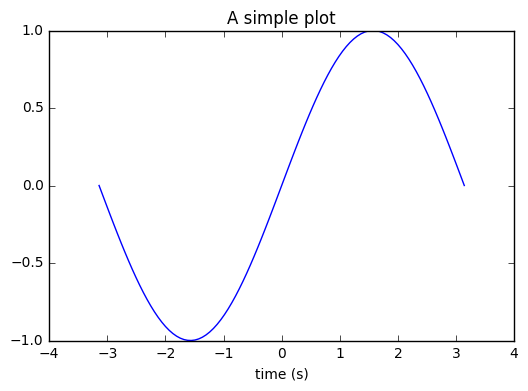

In [19]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title('A simple plot')
plt.xlabel('time (s)')

## Multiple subplots

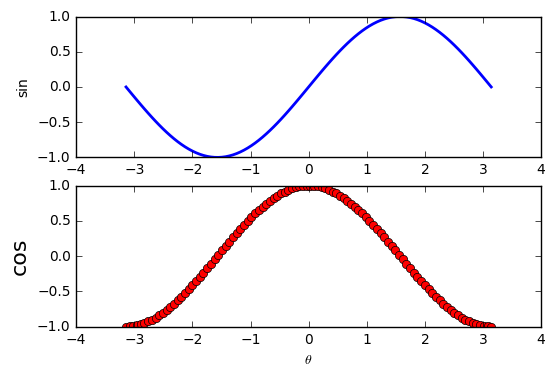

In [24]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.subplot(211) #create 2x1 plot, use 1st
plt.plot(x, y1, linewidth=2)
plt.ylabel('sin')
plt.subplot(212) #use 2nd
plt.plot(x, y2, '--or') # use dashed line, 'o' markers and red color
plt.ylabel('cos', fontsize=16)
plt.xlabel(r'$\theta$') # when using Latex, string has to be so called raw string (r'my string')